In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/gbm/ImpProcee760.csv')
df.head()

,ID,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,...,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Age,Survival,survival(high2mid1low0)
0,698,38872,13940,66553,1241,136042,1649009,3.571778,0.827307,0.090480,...,14.114033,2.04836,7.500000e-07,0.086603,0.146109,0.121849,451.63236,83.631202,684,0
1,939,13240,11804,11177,25877,131150,1248100,0.186595,0.537339,0.283592,...,16.242416,1.42728,7.500000e-07,0.128925,0.141562,0.047889,388.99118,55.982497,138,1
2,625,66752,76834,157509,44923,106856,1222309,0.186595,1.419532,0.119401,...,15.288934,1.00000,7.500000e-07,0.088421,0.157899,0.076818,221.53637,27.407796,5,1
3,666,1037,16013,39165,1241,23431,1232135,2.025378,0.729456,0.000666,...,3.170902,1.58967,7.500000e-07,0.116451,0.183424,0.091541,369.61860,55.993901,396,1
4,835,51016,47,96094,37387,87389,1378196,0.186595,0.373967,0.318822,...,11.014588,1.00000,7.500000e-07,0.063045,0.160702,0.082184,283.03649,62.083798,45,1


In [ ]:
target_name = 'survival(high2mid1low0)'

y = df['survival(high2mid1low0)']

x=df.drop('survival(high2mid1low0)',axis=1)

In [ ]:
x.shape

(760, 707)

In [ ]:
x.head()

,ID,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,...,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Age,Survival
0,698,38872,13940,66553,1241,136042,1649009,3.571778,0.827307,0.090480,...,659.8407,14.114033,2.04836,7.500000e-07,0.086603,0.146109,0.121849,451.63236,83.631202,684
1,939,13240,11804,11177,25877,131150,1248100,0.186595,0.537339,0.283592,...,5096.1019,16.242416,1.42728,7.500000e-07,0.128925,0.141562,0.047889,388.99118,55.982497,138
2,625,66752,76834,157509,44923,106856,1222309,0.186595,1.419532,0.119401,...,48.1569,15.288934,1.00000,7.500000e-07,0.088421,0.157899,0.076818,221.53637,27.407796,5
3,666,1037,16013,39165,1241,23431,1232135,2.025378,0.729456,0.000666,...,2589.9521,3.170902,1.58967,7.500000e-07,0.116451,0.183424,0.091541,369.61860,55.993901,396
4,835,51016,47,96094,37387,87389,1378196,0.186595,0.373967,0.318822,...,2030.1195,11.014588,1.00000,7.500000e-07,0.063045,0.160702,0.082184,283.03649,62.083798,45


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(608, 707)

In [ ]:
X_test.shape

(152, 707)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(corrmat)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

0

In [ ]:
corr_features

set()

In [ ]:
X_test.drop(corr_features,axis=1)

,ID,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,...,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Age,Survival
748,590,58370,47,67479,1241,12952,1653413,8.299301,0.188139,0.020973,...,1918.9546,13.386279,6.08428,1.000000e-09,0.063045,0.160653,0.087990,408.15105,48.514102,464
583,872,25974,12986,34359,1241,163097,1597682,5.242393,2.122348,0.237242,...,6971.4996,0.829255,1.00000,1.000000e-09,0.148531,0.183214,0.077156,2.00500,55.544246,137
575,846,38833,12214,93106,32344,70184,1149690,0.186595,1.333265,0.041899,...,780.0749,46.896946,5.28501,7.500000e-07,0.090552,0.086971,0.073000,187.70614,62.487656,1642
40,686,60882,37987,9757,6141,180011,1299547,0.186595,2.122348,0.236930,...,2839.4982,16.094110,1.00000,7.500000e-07,0.064938,0.174874,0.081050,327.21061,84.843836,5
243,678,38304,47,118823,1241,194200,1514563,0.409079,0.391573,0.117996,...,3945.5604,61.359800,4.35012,1.000000e-09,0.178609,0.183424,0.096117,393.17970,50.813759,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,661,1037,7888,57425,31871,24047,1176381,0.186595,1.349364,0.000666,...,48.1569,6.763906,3.41715,7.500000e-07,0.149636,0.183424,0.107566,341.25184,70.987487,5
432,761,30920,7055,9757,1241,102408,1637971,2.097244,0.669935,0.265220,...,938.7123,15.640181,5.94198,7.500000e-07,0.176044,0.154172,0.088812,246.55101,68.369545,157
425,787,30091,194,68769,1241,119885,1254492,3.737191,0.218007,0.134881,...,734.1024,12.014678,1.76284,7.500000e-07,0.178609,0.127364,0.046019,373.31300,36.349647,246
473,578,1037,25650,27436,1241,161938,1238754,24.125250,2.094824,0.000666,...,7341.6421,10.594364,2.10060,7.500000e-07,0.167346,0.067576,0.100058,340.59413,73.312884,5


In [ ]:
X_train.drop(corr_features,axis=1)

,ID,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,...,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Age,Survival
118,736,7177,43698,79836,10675,46366,1532362,0.186595,1.443974,0.087911,...,3228.8322,2.893048,1.00000,1.000000e-09,0.105138,0.148996,0.094898,2.00000,75.846936,446
240,732,90248,14061,60398,1241,84897,1477331,2.728607,0.803284,0.000666,...,7341.6421,61.032205,1.55325,1.000000e-09,0.140237,0.176046,0.087235,399.99961,37.271707,272
196,689,6510,69417,37473,1241,227182,1370882,0.186595,1.439608,0.161199,...,462.8023,60.789121,1.00000,7.500000e-07,0.063045,0.160254,0.052007,420.14591,49.254831,160
333,631,13405,14798,67457,1241,89230,1644766,3.443629,0.583756,0.000666,...,1706.8795,39.559843,2.10673,7.500000e-07,0.101406,0.146372,0.092725,444.39367,45.915710,295
301,714,63447,11796,85639,12952,71534,1633359,8.111263,0.556063,0.789249,...,7341.6421,4.125021,1.00000,7.500000e-07,0.144915,0.119529,0.131297,212.66171,84.843836,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,505,1037,20595,15365,44148,49561,1384136,7.255652,0.515579,0.057459,...,569.2396,0.695280,1.00000,1.000000e-09,0.131411,0.164902,0.103654,281.65631,56.131325,643
192,774,23680,20443,106593,18567,12952,1333143,0.186595,0.044948,0.000666,...,4237.6231,12.055358,2.66844,7.500000e-07,0.158389,0.163485,0.094935,202.68899,34.452776,313
629,926,81250,2990,103024,87617,90486,1149690,0.509907,1.400638,0.301210,...,48.1569,0.035506,1.00000,7.500000e-07,0.178609,0.127624,0.069245,308.70348,82.306864,364
559,743,6060,17369,17935,43107,200445,1236958,0.186595,0.674955,0.141655,...,3374.6446,61.359800,1.15949,1.000000e-09,0.151451,0.129391,0.064999,249.82642,58.673243,410


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 707))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

61/61 [==============================] - 0s 2ms/step - loss: 1.0877e-04 - accuracy: 1.0000
Train score: 0.00010876619489863515
Train accuracy: 1.0
5/5 [==============================] - 0s 3ms/step
********************
16/16 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9474
Test score: 0.1289457082748413
Test accuracy: 0.9473684430122375


In [ ]:
!pip install seaborn
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted label')

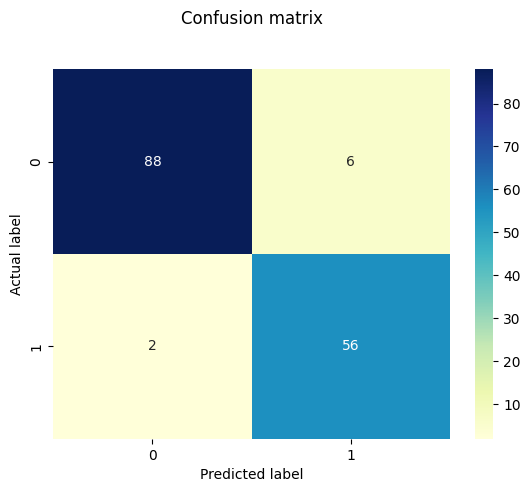

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        94
           1       0.90      0.97      0.93        58

    accuracy                           0.95       152
   macro avg       0.94      0.95      0.94       152
weighted avg       0.95      0.95      0.95       152



5/5 [==============================] - 0s 3ms/step


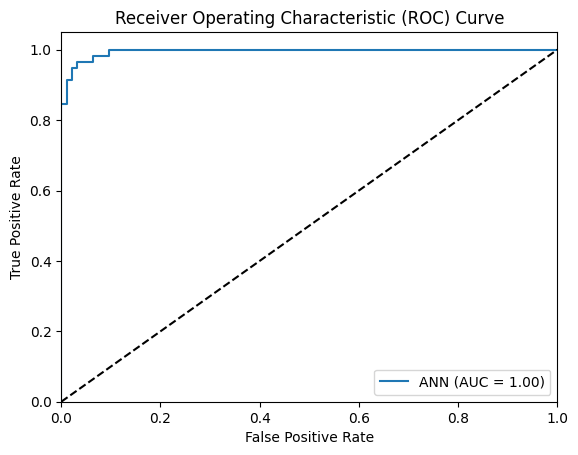

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Generate predicted probabilities for the test set
y_pred_proba = classifier.predict(X_test)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 0])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ANN (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()